## Support Vector Machine

### Generate Dataset

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X,Y=make_classification(n_classes=2,n_samples=400,n_informative=2,n_features=2,n_redundant=0,n_clusters_per_class=1,random_state=10)

In [5]:
# Convert Y to (-1,1)

Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [6]:
Y=np.where(Y==0,-1,1)
Y

array([ 1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1

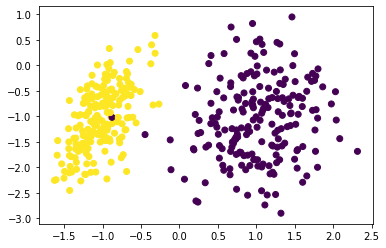

In [7]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [39]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        
        
    def hingeLoss(self,W,b,X,Y):
        m=X.shape[0]
        loss=0.0
        loss+=0.5*np.dot(W,W.T)
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T))+b
            loss+=self.C*(max(0,1-ti))
        
        return loss[0][0]
        
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_itr=300):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        c=self.C
        
        #Initiatize the model parameters
        W=np.zeros((1,no_of_features))
        bias=0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        #Training Here
        #Weight and Bias update rule
        
        losses=[]
        
        for i in range(max_itr):
            l=self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume Zero Gradient
                gradw=0
                gradb=0
                
                #Iterate over all examples in the batch size
                for j in range(batch_start,batch_start+batch_size):
                    if j <no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>=1:
                            gradw+=0
                            gradb+=0
                            
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                
                #Gradient for the batch is ready, Update Weight and bias
                
                W=W-learning_rate*W+learning_rate*gradw
                bias=bias+learning_rate*gradb
            
        
        self.W=W
        self.b=bias
        return losses,W,bias
            
    
                    
            
    

In [40]:
svm=SVM()
losses,W,b=svm.fit(X,Y)
losses

400.0


[400.0,
 236.15803638947716,
 96.16061645024209,
 53.523966979343726,
 40.02424477152639,
 34.06236688611234,
 30.71010697942505,
 27.91919305955134,
 25.707894861856467,
 23.841997166872638,
 22.160538815141486,
 20.86518101473155,
 19.900058560453274,
 19.34253275969726,
 18.857308350669282,
 18.376071071678435,
 17.8886254349733,
 17.534576219175577,
 17.05806432474121,
 16.81654299577819,
 16.403999772023802,
 16.0210869430076,
 15.639626304522583,
 15.276464944968497,
 15.053218668629146,
 14.802725264102348,
 14.733963623049734,
 14.567149922627532,
 14.413389606708321,
 14.319216006599724,
 14.225788757422313,
 14.0979391177065,
 14.058022422557523,
 13.988247017244259,
 13.905446788655022,
 13.868094497713479,
 13.834142987098927,
 13.839220955970706,
 13.844641102859251,
 13.82328350206544,
 13.810384893967385,
 13.733380857232442,
 13.69117759736343,
 13.649044733331865,
 13.60714685450563,
 13.565494871120618,
 13.489425042002694,
 13.448094767607511,
 13.406954889784608,
 1

In [41]:
W,b=svm.W,svm.b
print(W,b)

[[-2.06165049  0.42202004]] 0.08000000000000002


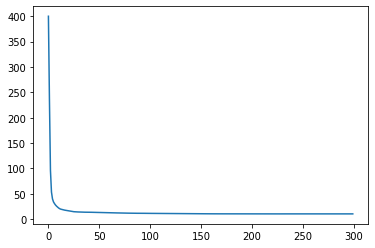

In [42]:
plt.plot(losses)
plt.show()

In [43]:
def hyperplane(w1,w2,b):
    
    x1=np.linspace(-2,3,5)
    x2=-(w1*x1+b)/w2  #WT+B=0
    
    xp=-(w1*x1+b+1)/w2 #WT+B=-1
    xn=-(w1*x1+b-1)/w2 #WT+B=1
    
    plt.figure(figsize=(15,15))
    plt.plot(x1,x2,label="hyperplane")
    plt.plot(x1,xp,label="pos")
    plt.plot(x1,xn,label="neg")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

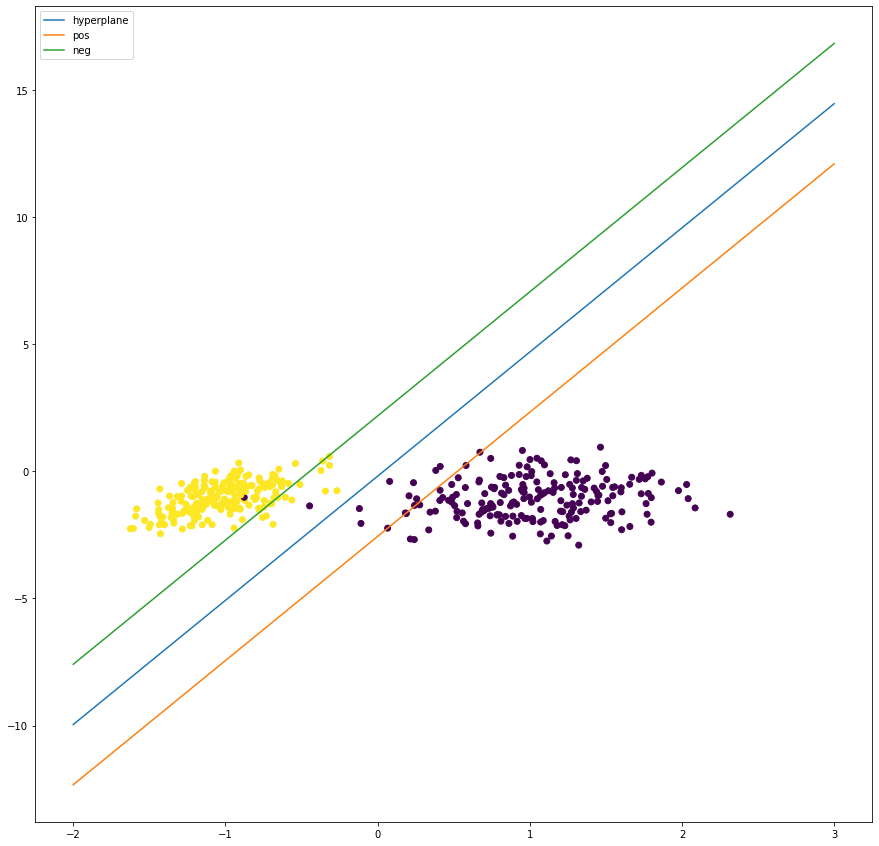

In [44]:
hyperplane(W[0,0],W[0,1],b)

## Visualizing effects of Increasing C on the graph

- The chances of error gets dimished, more points are assigned correctly but it leads to overfitting

In [45]:
svm2=SVM(C=1000)
losses,W,b=svm2.fit(X,Y)

400000.0


In [46]:
W2,b2=svm2.W,svm2.b
print(W2,b2)

[[-26.7441888    4.78401084]] -3.0


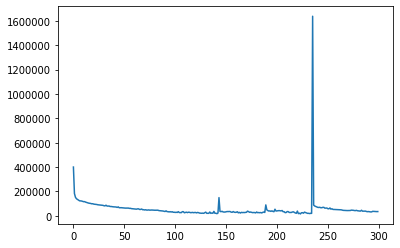

In [47]:
plt.plot(losses)
plt.show()

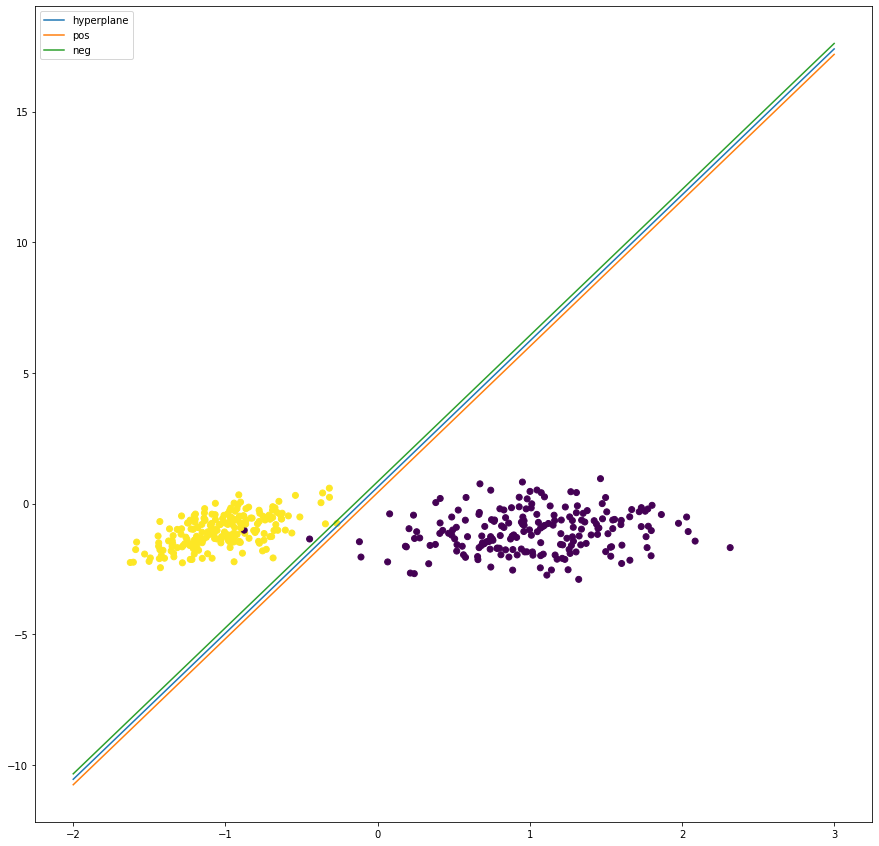

In [48]:
hyperplane(W2[0,0],W2[0,1],b2)